# JillyAtlanta Sales Analysis
Dollars per PDF over time
***

In [1]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt

In [2]:
fiels = glob.glob('./etsy/EtsySoldOrderItems/*.csv')
df1 = pd.DataFrame()
for fiel in fiels:
    dfi = pd.read_csv(fiel)
    df1 = pd.concat([df1, dfi])
# df1.columns

In [3]:
et_items = df1[['Sale Date',
           'Order ID', 
           'Item Name']].copy()
et_items.columns = ['date', 'order_id', 'item_name']
et_items['date'] = pd.to_datetime(et_items['date'])
et_items.sort_values(by='date', inplace=True)
# et_items.head()

In [4]:
def is_pdf(x):
    return 'pdf' in x.casefold()

et_items['is_pdf'] = et_items.item_name.apply(is_pdf)

In [5]:
# et_items.head()
# len(et_items)

In [6]:
et_items.drop_duplicates(subset=['order_id'], inplace=True)
#et_items.head(30)
# len(et_items)

In [7]:
fiels = glob.glob('./etsy/EtsySales/*.csv')
df2 = pd.DataFrame()
for fiel in fiels:
    dfi = pd.read_csv(fiel)
    df2 = pd.concat([df2, dfi])
# df2.columns

In [8]:
et_sales = df2[['Order Date',
                'Order ID', 
                'Net Amount', 
                'Refund Amount']].copy()
et_sales.columns = ['date', 'order_id', 'payment_amt', 'refund_amt']
et_sales['date'] = pd.to_datetime(et_sales['date'])
et_sales.sort_values(by='date', inplace=True)
et_sales.head()
len(et_sales)

12124

In [9]:
et_merged = pd.merge(et_sales, et_items, on='order_id', how='left')
et_merged.head(30)
len(et_merged)

12124

In [10]:
print(len(et_merged))
et_merged = et_merged[et_merged.is_pdf == True]
print(len(et_merged))
et_merged['net_amt'] = et_merged['payment_amt'] - et_merged['refund_amt']
#et_merged.head()

12124
11781


In [11]:
#listings = et_merged.item_name.drop_duplicates()
#len(listings)

In [12]:
listings = pd.read_csv('listings.csv')
listings_dict = dict(zip(listings.listing.values, listings.item.values))

In [13]:
# gapminder_df['pop']= gapminder_df['continent'].map(pop_dict)

In [14]:
et_merged['item'] = et_merged['item_name'].map(listings_dict)
et = et_merged[['date_x', 'item', 'net_amt']].copy()
et.columns = ['date', 'item', 'net']
et.head()

,date,item,net
11,2014-12-06,gathered_skirt,8.48
16,2015-02-07,criss_cross_cape,8.48
19,2015-02-19,criss_cross_cape,8.48
23,2015-03-02,criss_cross_cape,8.48
25,2015-03-06,lottie_bonnet,5.57


In [15]:
patterns_set = set()
patterns = list(et.item.values)
nets = list(et.net.values)

num_patterns = []
pattern_Count = 0
for pattern in patterns:
    if pattern not in patterns_set:
        patterns_set.add(pattern)
        pattern_Count += 1
    num_patterns.append(pattern_Count)

net_total = []
net_sum = 0
for net in nets:
    net_sum += net
    net_total.append(net_sum)

print(num_patterns[:10])
print(net_total[:10])

doll_per_patt = np.array(net_total) / np.array(num_patterns)

[1, 2, 2, 2, 3, 3, 3, 3, 3, 3]
[8.48, 16.96, 25.44, 33.92, 39.49, 45.06, 50.63, 56.2, 64.68, 73.16000000000001]


In [16]:
et['num_patterns'] = num_patterns
et['net_sum'] = net_total
et['dollars_per_pattern'] = doll_per_patt
et.head()

,date,item,net,num_patterns,net_sum,dollars_per_pattern
11,2014-12-06,gathered_skirt,8.48,1,8.48,8.480000
16,2015-02-07,criss_cross_cape,8.48,2,16.96,8.480000
19,2015-02-19,criss_cross_cape,8.48,2,25.44,12.720000
23,2015-03-02,criss_cross_cape,8.48,2,33.92,16.960000
25,2015-03-06,lottie_bonnet,5.57,3,39.49,13.163333


Text(0.5, 1.0, 'Dollars per Pattern over Time')

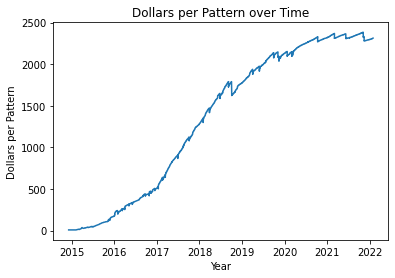

In [21]:
plt.plot(et.date, et.dollars_per_pattern)
plt.xlabel('Year')
plt.ylabel('Dollars per Pattern')
plt.title('Dollars per Pattern over Time')